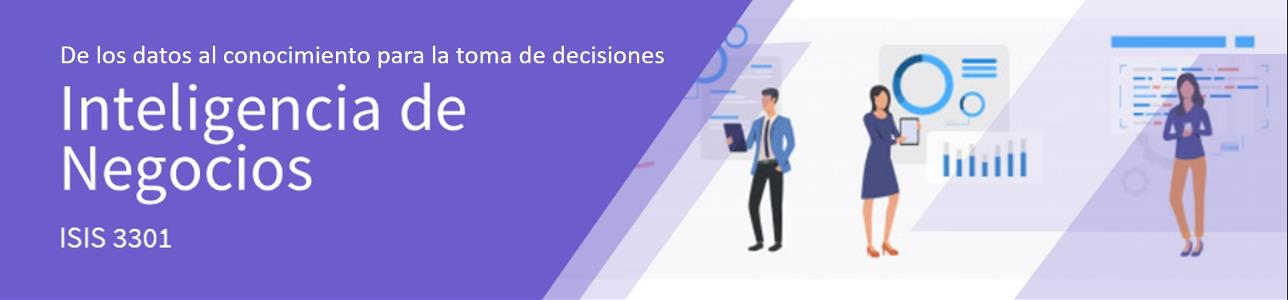

## Proyecto 1: Etapa 1  (Construcción de Modelos de Analítica de textos)

#### Integrantes (Grupo 37)

Antonin Bouillaud <br/> 
Ernesto Duarte Mantilla <br/>
Lina María Gómez Mesa. 

Este proyecto tiene como objetivo desarrollar un modelo de clasificación, con técnicas de aprendizaje
automático, que permita relacionar de manera automática un texto según los ODS. Dado que el número del grupo es impar se seleccionan los ODS 3, 4, 5.

## 0. Preparación
### 0.1. Importación de librerías

Inicialmente, se importan las librerías. Se cargan e importan múltiples librerías que se utilizarán a lo largo del proyecto tanto de procesamiento de texto como de aprendizaje automático. En el primer paso, se: 1) instalan en caso de que no se tengan instaladas y 2) se importan.

In [1]:
#########################################################################
# Instalación de Librerías
#########################################################################
!pip install scikit-learn==1.2.0
!pip install contractions
!pip install inflect
!pip install pandas-profiling
!pip install num2words
!pip install langdetect
!pip install swifter
!pip install openpyxl
!pip install spacy~=3.1
!pip install ipywidgets
!pip install --user -U nltk
!pip install eli5
!pip install nltk
!python -m spacy download es_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 24.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [2]:
######################################################################
# Importación de librerias
######################################################################
import pandas as pd
pd.set_option('display.max_colwidth', None)
import spacy
import statistics
from nltk.stem import SnowballStemmer
import numpy as np
import sys
import warnings
import swifter
from pandas_profiling import ProfileReport
from langdetect import detect
import re, string, unicodedata
import contractions
from sklearn.linear_model import RidgeClassifier
from joblib import parallel_backend
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import FitFailedWarning
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, words
from num2words import num2words
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD

/home/lgomez/anaconda3/envs/bi/lib/python3.8/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/lgomez/anaconda3/envs/bi/lib/python3.8/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_773389/3909171684.py:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by Ap

###  0.2. Carga de los datos

A continuación se procede a importar los datos etiquetados. Estos son los primeros datos que se utilizarán para entrenar el modelo. Se importan los datos de la carpeta "data" y se guardan en un dataframe llamado "data" también.

In [3]:
data = pd.read_excel("data/cat_345.xlsx")

Ahora, se observa cuáles son las columnas que presenta el dataframe cargado. Se observa, que tiene 2 columnas: 'Textos_espanol' y 'sdg'. La columna 'Textos_espanol' contiene el texto (descripción) y la columna "sdg" contiene la etiqueta que se le asignó a cada texto según el ODS al que pertenece (3, 4 o 5).

In [4]:
data.columns

Index(['Textos_espanol', 'sdg'], dtype='object')

## 1. Entendimiento de los datos

Se revisan los valores que toman las columnas en algunos registros:

In [5]:
data.sample(5)

,Textos_espanol,sdg
870,"En cambio, su objetivo es captar los diferentes tipos de reformas, así como identificar algunos enfoques comunes que se han implementado en muchos países. Reducir los precios pagados por la atención médica financiada con fondos públicos (por ejemplo, recortes en el precio de los productos médicos y los salarios). Sin embargo, varios países han introducido nuevos arreglos financieros para ampliar las bases de ingresos, crear una mayor flexibilidad y equidad en el financiamiento de la atención de la salud.",3
1320,"El personal docente está formado por miembros cristianos, judíos y musulmanes. Los programas de estudio integran práctica, educación y teoría. Las tasas de matrícula son altas y los estudiantes pagan USD 2 500. Para 2010, el presupuesto de la universidad es de USD 1,8 millones: el 50 % del presupuesto está cubierto por el consejo de administración (principalmente del estado de Illinois y Austria), el 25 % de las tasas de matrícula, el resto por la comunidad árabe local.",4
302,"Los indicadores de mortalidad, como el suicidio y la mortalidad prematura, proporcionan información importante sobre el estado de salud mental y la interacción de la salud mental y física, pero se necesitan indicadores más específicos para reflejar la calidad de la atención de salud mental. Medir y mejorar la calidad de la atención de salud mental es un reto fundamental, sobre todo por la necesidad de reflejar vías de atención complejas y abarcar diversos resultados. Numerosos proyectos en curso y finalizados tratan de medir y comparar la calidad y los resultados de la atención de salud mental a escala internacional, a pesar de los numerosos retos a los que se enfrentan.",3
2921,"En este contexto, la provisión de igualdad de oportunidades en un sentido legalista puede no ser suficiente para lograr la igualdad de género ya que el acceso de las mujeres es limitado de facto. Un ejemplo es la opción de que los padres trabajen medio tiempo hasta que el niño cumpla 7 años. Si bien esta opción se dirige tanto a los padres como a las madres, la mayoría de las mujeres la adoptan (Capítulo 1). Por ejemplo, si bien el tiempo de trabajo reducido puede ser preferible individualmente, el comportamiento miope puede no internalizar completamente los efectos a largo plazo sobre los derechos de pensión y el riesgo de pobreza en la vejez.",5
529,"Las variables independientes incluyen actividades de la vida diaria, enfermedades crónicas e interacciones de categorías de ADL y condiciones de enfermedad. Haber fumado alguna vez, residir en el noreste, la mortalidad, la obesidad y el estado de salud física (medido por el número de ADL y la admisión a un asilo de ancianos) tienen efectos considerables en los gastos. Además, las personas que mueren durante el año tienen gastos médicos sustancialmente más altos que los sobrevivientes.",3


Se revisa el tipo de dato de cada atributo:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  3000 non-null   object
 1   sdg             3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Se observa que en los datos hay *2* columnas: *Textos_espanol* y *sdg*. La columna *sdg* es la variable objetivo y la columna *Textos_espanol* es la información textual. Asimismo, se contabiliza el número de registros. Se observa que el tipo de dato es _non-null object_ para ambas columnas y que el registro está completo.

In [7]:
total_rows_count = data.shape[0]
total_cols_count = data.shape[1]
print(f"Total de filas {total_rows_count} y columnas {total_cols_count}")

Total de filas 3000 y columnas 2


Antes de comenzar a plantear los modelos es importante dividirlo en dos partes: una para entrenamiento _train_ y otra para pruebas _test_. Esto es importante para poder evaluar el modelo que se construya. Para ello se utiliza la función train_test_split de la libreria sklearn.model_selection. Únicamente se realizará el análisis sobre el conjunto de entrenamiento.

###  1.1. Subdivisión de los datos en train y test

In [8]:
Y = data['sdg']
X = data.drop(['sdg'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234, stratify=Y)
print(f"Total de filas en entrenamiento {X_train.shape[0]} y test {X_test.shape[0]}")

Total de filas en entrenamiento 2400 y test 600


### 1.2. Análisis exploratorio de los datos

##### 1.2.1 Análisis de la variable objetivo

In [9]:
Y_train.value_counts(dropna = False, normalize = True)

sdg
3    0.333333
5    0.333333
4    0.333333
Name: proportion, dtype: float64

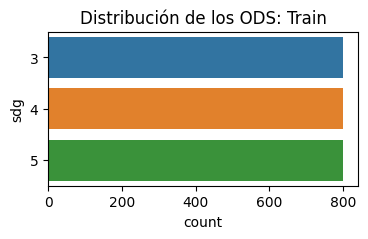

In [10]:
plt.figure(figsize=(4, 2))
sns.countplot(y=Y_train)
plt.title(f'Distribución de los ODS: Train')
plt.show()

Se observa que la cantidad de registros de cada uno de los ODS es la misma (0,33). Es decir que se cuenta con una misma cantidad de datos en las tres categorías para los procesos de clasificación, lo cuál indica que es un problema balanceado.

##### 1.2.3 Análisis de la variable Textos_espanol

In [11]:
X_train['idioma'] = X_train['Textos_espanol'].apply(detect)
X_train['idioma'].value_counts(dropna = False, normalize = True)

idioma
es    0.997917
en    0.001250
fr    0.000833
Name: proportion, dtype: float64

A continuación, se muestran las filas encontradas en francés.

In [12]:
X_train[X_train['idioma']=="fr"]

,Textos_espanol,idioma
1077,"Dans le cours de cette etude, les comparaisons sont realizasees entre l'EFP et la formation académique a niveau d'education equivalente: ainsi, les resultats de la premiere option (opción 3e) sont compares a ceux de la deuxieme option (4e opción). Selon les objectifs poursuivis, d'autres comparaisons sont possibles et pourraient dresser un tableau different par rapport a celui present dans cette etude.",fr
2834,"Par ailleurs, les resultats suggerent que l'effet des services de la petite enfance sur l'emploi des femmes est renforce lorsqu'ils sont associes a d'autres mesures favorisant les meres qui travaillent (comme par exemple le conge paye parental), mais que celles-ci reduisent l'efficacite des incitations financieres a travailler pour le partenaire.",fr


A continuación, se muestran las filas encontradas en inglés.

In [13]:
X_train[X_train['idioma']=="en"]

,Textos_espanol,idioma
960,"Aumento de la longevidad y gastos de Medicare. Demography 38: 215-226. Mid-long Term Trends for The Pension, Health and Long-term Care Systems. La necesidad futura de cuidados: Resultados del proyecto LEV. Estocolmo: Gobierno de Suecia. Population Aeging and the Determinants of Healthcare Expenditures: The Case of Hospital, Medical and Pharmaceutical Care in British Columbia, 1996 to 2006.",en
324,"Urban Poverty and Household Strategies in Dhaka City, Bangladeshâ€, en Quality-assured Stream: in Conference Proceedings of the 2003 Sociological Association of Aotearoa Conference: â€œKnowledge, Capitalism, Critique"", 9-11 de diciembre, Auckland University of Technology, disponible en http://saanz.rsnz.org/hossain Health and Social Conditions in the Dhaka Slumsâ€ (The International Society for Urban Health), consultado desde www.isuh.org/download/dhaka.pdf el 25 de junio de 2008 . Nueva evidencia sobre la urbanización de la pobreza global”, Documento de Trabajo de Investigación de Políticas No.",en
2613,"París: Organización de Cooperación y Desarrollo Económicos. Marriage, Motherhood and Masculinity in the Global Economy: Reconfigurations of Personal and Economic Life, Documento de trabajo nº Brighton del IDS: Institute of Development Studies. Drivers of Female Labor Force Participation During India's Economic Boom, IZA Discussion Papers 6395, Instituto para el Estudio del Trabajo (IZA).",en


De acuerdo a lo anterior, se observa que en los datos hay pequeño porcentaje de reseñas que se encuentran en inglés y en francés. Por lo tanto, estos son posibles registros candidatos a ser eliminados del conjunto de datos.

In [14]:
def contiene_caracter(texto):
    return 'Ã' in texto

filas_con_caracteres_no_alfanumericos = X_train['Textos_espanol'].apply(contiene_caracter)
conteo = filas_con_caracteres_no_alfanumericos.sum()

print(f'Número de filas con distinta codificación: {conteo}')

Número de filas con distinta codificación: 206


Asimismo, se observa que hay registros que tienen una codificación distinta a la del español (con carácteres como Ã,Ã³,©).

##### 1.2.2 Completitud

In [15]:
print((X_train.isnull().sum() / X_train.shape[0]).sort_values(ascending = False))

Textos_espanol    0.0
idioma            0.0
dtype: float64


##### 1.2.3 Duplicidad

In [16]:
duplicates = X_train.duplicated()
num_duplicates = duplicates.sum()
print("Número de duplicados: ", num_duplicates)

Número de duplicados:  0


##### 1.2.4 Estadísticas Descriptivas

In [17]:
textos = X_train.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] =  [max(set(x.split(' ')), key=x.split(' ').count) for x in textos['Textos_espanol']]
textos['Max'] =  [max([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
#ProfileReport(textos)

## 2. Preparación de los datos

En este caso, para poder realizar el pre-procesamiento de los datos (en particular la columna tipo texto), es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

In [18]:
############################################################
# Preprocesamiento Funciones: LIMPIEZA DE TEXTO
############################################################

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation in Spanish"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in set(stopwords.words('spanish')):
            new_words.append(word)
    return new_words
def join_words(words):
    """Join a list of words into a single string"""
    return ' '.join(map(str, words))

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = join_words(words)
    return words

############################################################
# Preprocesamiento Funciones: LEMATIZACIÓN
############################################################
def stem_words(text):
    """Stem words in a text (Spanish)"""
    stemmer = SnowballStemmer("spanish")
    words = word_tokenize(text, language="spanish")
    stems = [stemmer.stem(word) for word in words]
    return stems
def lemmatize_verbs(text):
    """Lemmatize verbs in text (Spanish)"""
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(text)
    lemmas = [token.lemma_ if token.pos_ == "VERB" else token.text for token in doc]
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

#### 2.1 Limpieza de los datos

Se comienza por eliminar aquellos comentarios que no están en español. Para ello se utiliza la librería langdetect. Se crea una función que detecte el idioma de cada comentario y se elimina aquellos que no estén en español.

In [19]:
data_copy = data.copy()

In [20]:
from tqdm import tqdm
############################################################
# Preprocesamiento Funciones: Limpieza de Datos
############################################################
def preprocess_other_language_rows(da):
    print("Total de filas antes de limpieza: ", da.shape[0])
    for i in tqdm(range(15)):
        while True:
            da['idioma'] = da['Textos_espanol'].apply(detect)
            da = da[da['idioma']=="es"].copy()

            da['idioma'] = da['Textos_espanol'].apply(detect)
            otro_idioma = da[da['idioma']!="es"]
            
            if otro_idioma.empty:
                break
    
    print("Total de filas después de limpieza: ", da.shape[0])
    return da

#X_train= preprocess_other_language_rows(X_train)

In [21]:
X_train['idioma'] = X_train['Textos_espanol'].apply(detect)
X_train['idioma'].value_counts(dropna = False, normalize = True)

idioma
es    0.997917
en    0.001250
fr    0.000833
Name: proportion, dtype: float64

In [22]:
X_train_clean = X_train.copy()
Y_train_clean = Y_train.loc[X_train.index].copy()

#assert X_train_clean['idioma'].value_counts(normalize=True)['es'] == 1.0
#assert X_train_clean.shape[0] == Y_train_clean.shape[0]

X_train_clean.sample(2)

,Textos_espanol,idioma
1274,"La calidad de los docentes también se ha desarrollado a través de una sólida formación docente inicial a nivel de maestría con experiencia práctica. La transferencia de los servicios de atención y educación de la primera infancia del Ministerio de Asuntos Sociales y Salud al Ministerio de Educación y Cultura (2013) representa un gran cambio de perspectiva. Educación e Investigación 2011-2016: Un plan de desarrollo tiene como objetivo aumentar la participación de los estudiantes de origen inmigrante en la educación preparatoria para mejorar sus oportunidades de terminar la educación secundaria superior. Se está desarrollando una reforma curricular desde la educación preescolar hasta la educación secundaria superior, que se implementará desde 2016.",es
2878,"En la práctica, sin embargo, los créditos corresponden a las mujeres en mucha mayor medida que a los hombres, dado que las mujeres asumen la mayor parte del trabajo de cuidados. Las pensiones sociales son particularmente importantes en países donde la cobertura de los planes de seguro social contributivos es limitada y la mayoría de la fuerza laboral tiene un empleo informal. Debido a que las personas con antecedentes contributivos limitados tienden a concentrarse entre los grupos de bajos ingresos, las pensiones sociales no contributivas son esenciales para la prevención de la pobreza en la vejez. Las mujeres mayores han estado al frente de estas movilizaciones.",es


#### 2.2 Tokenización

Ahora se aplica la función a la columna Textos_espanol y se aplica el pre-procesamiento de los datos. Para ello se crea una función que realice las siguientes tareas:
* Pasar a minúsculas.
* Reemplazar los números por su correspondiente palabra.
* Eliminar los signos de puntuación.
* Eliminar caracteres especiales.
* Eliminar stopwords.

In [23]:
X_train_clean['texto_limpio'] = X_train_clean['Textos_espanol'].swifter.apply(word_tokenize,language="spanish").swifter.apply(preprocessing)
X_train_clean.to_excel("data/cat_345_clean_sin_lema.xlsx")

Pandas Apply:   0%|          | 0/2400 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2400 [00:00<?, ?it/s]

#### 2.3 Normalización

In [24]:
X_train_clean['texto_limpio'] = X_train_clean['texto_limpio'].swifter.apply(stem_and_lemmatize).swifter.apply(join_words)
X_train_clean.to_excel("data/cat_345_clean_con_lema.xlsx")

Pandas Apply:   0%|          | 0/2400 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2400 [00:00<?, ?it/s]

Este mismo proceso se realiza para el conjunto de datos de test.

#### 2.4 Aplicación del Mismo Procesamiento a los Datos de Test

In [25]:
# X_test['idioma'] = X_test['Textos_espanol'].apply(detect)
#X_test= preprocess_other_language_rows(X_test)
X_test_clean = X_test.copy()
Y_test_clean = Y_test.loc[X_test.index].copy()
# es_mask_t = X_test['idioma'] == 'es'
# X_test_clean = X_test.loc[es_mask_t].copy()
# Y_test_clean = Y_test.loc[es_mask_t].copy()

#Y_test_clean = Y_test.copy()

#assert X_test_clean['idioma'].value_counts(normalize=True)['es'] == 1.0
#assert X_test_clean.shape[0] == Y_test_clean.shape[0]

#X_test_clean = X_test.copy()

# X_test_clean.drop(['idioma'], axis=1, inplace=True)

# print("Total de filas después de limpieza: ", X_train_clean.shape[0])

In [26]:
X_test_clean['texto_limpio'] = X_test_clean['Textos_espanol'].swifter.apply(word_tokenize, language="spanish").swifter.apply(preprocessing)
X_test_clean.to_excel("data/cat_345_clean_sin_lema_test.xlsx")
X_test_clean['texto_limpio'] = X_test_clean['texto_limpio'].swifter.apply(stem_and_lemmatize).swifter.apply(join_words)
X_test_clean.to_excel("data/cat_345_clean_con_lema_test.xlsx")

Pandas Apply:   0%|          | 0/600 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/600 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/600 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/600 [00:00<?, ?it/s]

#### 2.5 Codificación del Texto

Posteriormente, se realiza la codificación del texto. Para ello se utiliza la librería CountVectorizer y TfidfVectorizer.

#### Importación de datos depurados con lematización para evitar tener que recargar el código.

In [27]:
X_train_clean = pd.read_excel("data/cat_345_clean_con_lema.xlsx")
X_test_clean = pd.read_excel("data/cat_345_clean_con_lema_test.xlsx")

##### 2.5.1 Codificación del Texto CountVectorizer

In [28]:
def tokenizer(text):
    return word_tokenize(text, language="spanish")

dummy = CountVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('spanish'), lowercase=True)
X_train_BoW = dummy.fit_transform(X_train_clean['texto_limpio'])
X_test_BoW = dummy.transform(X_test_clean['texto_limpio'])

/home/lgomez/anaconda3/envs/bi/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


##### 2.5.2 Codificación del Texto Tfidf

In [29]:
vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words=stopwords.words('spanish'), tokenizer=tokenizer
    )
X_train_TFID = vectorizer.fit_transform(X_train_clean['texto_limpio'])
X_test_TFID = vectorizer.transform(X_test_clean['texto_limpio'])

## 3. Creación y Aplicación del modelo

###  3.1. Modelo 1 - Estudiante: Antonin Bouillaud (RF)

In [30]:
particiones = KFold(n_splits=5, shuffle=True, random_state=1234)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [7,8],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' : [True, False]
}
rfc = RandomForestClassifier(random_state=1234)

#####  3.3.1 Bag of Words

In [31]:
grid_search_BoW = GridSearchCV(rfc, param_grid, cv=particiones, n_jobs=1, scoring='accuracy')
grid_search_BoW.fit(X_test_BoW, Y_test_clean)

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(grid_search_BoW.best_params_)
print("Mejor exactitud (accuracy) encontrada:")
print(grid_search_BoW.best_score_)

In [ ]:
best_rfc_BoW = grid_search_BoW.best_estimator_

In [ ]:
######################################################################
# Train
######################################################################
Y_pred_train_BoW = best_rfc_BoW.predict(X_train_BoW)
print(classification_report(Y_train_clean, Y_pred_train_BoW))
######################################################################
# Matriz de Confusión
######################################################################
cm_BoW = confusion_matrix(Y_train_clean, Y_pred_train_BoW)
disp_BoW = ConfusionMatrixDisplay(confusion_matrix=cm_BoW, display_labels=best_rfc_BoW.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_BoW.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')

cm_BoW_norm = confusion_matrix(Y_train_clean, Y_pred_train_BoW, normalize='true')
disp_BoW_norm = ConfusionMatrixDisplay(confusion_matrix=cm_BoW_norm, display_labels=best_rfc_BoW.classes_)
disp_BoW_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Train: RF')
plt.tight_layout()
plt.show()

In [ ]:
######################################################################
# Test
######################################################################
Y_pred_test_BoW = best_rfc_BoW.predict(X_test_BoW)
print(classification_report(Y_test_clean, Y_pred_test_BoW))
######################################################################
# Matriz de Confusión
######################################################################
cm_BoW = confusion_matrix(Y_test_clean, Y_pred_test_BoW)
disp_BoW = ConfusionMatrixDisplay(confusion_matrix=cm_BoW, display_labels=best_rfc_BoW.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_BoW.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_BoW_norm = confusion_matrix(Y_test_clean, Y_pred_test_BoW, normalize='true')
disp_BoW_norm = ConfusionMatrixDisplay(confusion_matrix=cm_BoW_norm, display_labels=best_rfc_BoW.classes_)
disp_BoW_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Test: RF')
plt.tight_layout()
plt.show()

#####  3.3.2 Tfidf

In [ ]:
grid_search_TFID = GridSearchCV(rfc, param_grid, cv=particiones, n_jobs=-1, scoring='accuracy')
grid_search_TFID.fit(X_train_TFID, Y_train_clean)

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(grid_search_TFID.best_params_)
print("Mejor exactitud (accuracy) encontrada:")
print(grid_search_TFID.best_score_)

In [ ]:
best_rfc_TFID = grid_search_TFID.best_estimator_

In [ ]:
######################################################################
# Train
######################################################################
Y_pred_train_TFID = best_rfc_TFID.predict(X_train_TFID)
print(classification_report(Y_train_clean, Y_pred_train_TFID))
######################################################################
# Matriz de Confusión
######################################################################
cm_TFID = confusion_matrix(Y_train_clean, Y_pred_train_TFID)
disp_TFID = ConfusionMatrixDisplay(confusion_matrix=cm_TFID, display_labels=best_rfc_TFID.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_TFID.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_TFID_norm = confusion_matrix(Y_train_clean, Y_pred_train_TFID, normalize='true')
disp_TFID_norm = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_norm, display_labels=best_rfc_TFID.classes_)
disp_TFID_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Train: RF')
plt.tight_layout()
plt.show()

In [ ]:
######################################################################
# Test
######################################################################
Y_pred_test_TFID = best_rfc_TFID.predict(X_test_TFID)
print(classification_report(Y_test_clean, Y_pred_test_TFID))
######################################################################
# Matriz de Confusión
######################################################################
cm_TFID_test = confusion_matrix(Y_test_clean, Y_pred_test_TFID)
disp_TFID_test = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_test, display_labels=best_rfc_TFID.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_TFID_test.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_TFID_norm_test = confusion_matrix(Y_test_clean, Y_pred_test_TFID, normalize='true')
disp_TFID_norm_test = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_norm_test, display_labels=best_rfc_TFID.classes_)
disp_TFID_norm_test.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Test: RF')
plt.tight_layout()
plt.show()

###  3.2. Modelo 2 - Estudiante: Ernesto Duarte Mantilla (KNN y Naive Bayes)

Para aplicar este modelo, primero reduciremos la dimensionalidad. Para ello, utilizaremos LSA, debido a que tenemos una matriz dispersa resultado de aplicar TFID. No utilizamos PCA debido a que este algoritmo no es bueno con matrices dispersas sino densas, pero convertir una matriz dispersa en densa es poco eficiente.

#### 3.2.1. Reducción de dimensionalidad: LSA

In [ ]:
# Reducción de dimensionalidad con LSA para TFID
svdTFID = TruncatedSVD(n_components=100, random_state=1234)
X_train_LSA_TFID = svdTFID.fit_transform(X_train_TFID)
X_test_LSA_TFID = svdTFID.transform(X_test_TFID)

In [ ]:
# Reduccion de dimensionalidad con LSA para CV
svdCV = TruncatedSVD(n_components=100, random_state=1234)
X_train_LSA_CV = svdCV.fit_transform(X_train_BoW)
X_test_LSA_CV = svdCV.transform(X_test_BoW)

In [ ]:
# visualización de la varianza explicada CV
plt.figure(figsize=(10, 6))
plt.plot(svdCV.explained_variance_ratio_)
plt.xlabel("Componentes")
plt.ylabel("Varianza explicada")
plt.title("Varianza explicada por cada componente - Codificación Count Vectorizer")
plt.show()

In [ ]:
# visualización de la varianza explicada TDIF
plt.figure(figsize=(10, 6))
plt.plot(svdTFID.explained_variance_ratio_)
plt.xlabel("Componentes")
plt.ylabel("Varianza explicada")
plt.title("Varianza explicada por cada componente - Codificación TF-IDF")
plt.show()

In [ ]:
# visualización de la varianza explicada CV LSA
acumulative_explained_variance_CV = np.cumsum(svdCV.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(acumulative_explained_variance_CV, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada vs. Número de componentes - CV')
plt.grid(True)
plt.show()


In [ ]:
# visualización de la varianza explicada TFID LSA
acumulative_explained_variance_TFID = np.cumsum(svdTFID.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(acumulative_explained_variance_TFID, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada vs. Número de componentes')
plt.grid(True)
plt.show()


Cos datos codificados con CV se mantienen 20 componentes debido a los resultados de las gráficas. Para el caso de los datos codificados con TFID se mantienen entonces 12 componentes.

Se procede a correr los modelos correspondientes con ambas porciones de datos para conocer cuál tiene mejor desempeño.

#### 3.2.2. Modelo KNN

##### 3.2.2.1 Count Vectorizer

In [ ]:
# KNN CV
knnCV = KNeighborsClassifier(n_neighbors=5)
knnCV.fit(X_train_LSA_CV, Y_train_clean)
Y_pred_KNN_CV = knnCV.predict(X_test_LSA_CV)


In [ ]:
# Métricas

accuracy_score_knn_CV = accuracy_score(Y_test_clean, Y_pred_KNN_CV)
precision_score_knn_CV = precision_score(Y_test_clean, Y_pred_KNN_CV, average='macro')
recall_score_knn_CV = recall_score(Y_test_clean, Y_pred_KNN_CV, average='macro')
f1_score_knn_CV = f1_score(Y_test_clean, Y_pred_KNN_CV, average='macro')

print("Accuracy:", accuracy_score_knn_CV)
print("Precision:", precision_score_knn_CV)
print("Recall:", recall_score_knn_CV)
print("F1:", f1_score_knn_CV)


In [ ]:
# Validacion cruzada
scores = cross_val_score(knnCV, X_train_LSA_CV, Y_train_clean, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


##### 3.2.2.2 TFID

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# KNN TFID
knnTFID = KNeighborsClassifier(n_neighbors=5)
knnTFID.fit(X_train_LSA_TFID, Y_train_clean)
Y_pred_KNN_TFID = knnTFID.predict(X_test_LSA_TFID)


In [ ]:
# Revisar valores de Y
print(Y_pred_KNN_TFID.shape)

In [ ]:
# Métricas

accuracy_score_knn_TFID = accuracy_score(Y_test_clean, Y_pred_KNN_TFID)
precision_score_knn_TFID = precision_score(Y_test_clean, Y_pred_KNN_TFID, average='macro')
recall_score_knn_TFID = recall_score(Y_test_clean, Y_pred_KNN_TFID, average='macro')
f1_score_knn_TFID = f1_score(Y_test_clean, Y_pred_KNN_TFID, average='macro')

print("Accuracy:", accuracy_score_knn_TFID)
print("Precision:", precision_score_knn_TFID)
print("Recall:", recall_score_knn_TFID)
print("F1:", f1_score_knn_TFID)


In [ ]:
# Validacion cruzada
scores = cross_val_score(knnTFID, X_train_LSA, Y_train_clean, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


#### 3.2.3 Modelo Naive Bayes Multinomial

##### 3.2.3.1 Count Vectorizer

In [ ]:
# Implementacion modelo Naive Bayes Multinomial CV
clfCV = MultinomialNB()
clfCV.fit(X_train_BoW, Y_train_clean)


In [ ]:
# Predicción
Y_pred_MNB_BoW = clfCV.predict(X_test_BoW)

In [ ]:
# Métricas para algoritmo Multimodal Naive Bayes con método de codificación Count Vectorizer
accuracy_score_mnb = accuracy_score(Y_test_clean, Y_pred_MNB_BoW)
precision_score_mnb = precision_score(Y_test_clean, Y_pred_MNB_BoW, average='macro')
recall_score_mnb = recall_score(Y_test_clean, Y_pred_MNB_BoW, average='macro')
f1_score_mnb = f1_score(Y_test_clean, Y_pred_MNB_BoW, average='macro')

print("Accuracy: ", accuracy_score_mnb)
print("Precision: ", precision_score_mnb)
print("Recall: ", recall_score_mnb)
print("F1: ", f1_score_mnb)

print(classification_report(Y_test_clean, Y_pred_MNB_BoW))

In [ ]:
# Matriz de confusión

matriz_confusion = confusion_matrix(Y_test_clean, Y_pred_MNB_BoW)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión para Multinomial Naive Bayes')
plt.show()

##### 3.2.3.1 TDIF

In [ ]:
# Implementacion modelo Naive Bayes Multinomial CV
clfTDIF = MultinomialNB()
clfTDIF.fit(X_train_TFID, Y_train_clean)


In [ ]:
# Predicción
Y_pred_MNB_TDIF = clfTDIF.predict(X_test_TFID)

In [ ]:
# Métricas
accuracy_score_mnb = accuracy_score(Y_test_clean, Y_pred_MNB_TDIF)
precision_score_mnb = precision_score(Y_test_clean, Y_pred_MNB_TDIF, average='macro')
recall_score_mnb = recall_score(Y_test_clean, Y_pred_MNB_TDIF, average='macro')
f1_score_mnb = f1_score(Y_test_clean, Y_pred_MNB_TDIF, average='macro')

print("Accuracy: ", accuracy_score_mnb)
print("Precision: ", precision_score_mnb)
print("Recall: ", recall_score_mnb)
print("F1: ", f1_score_mnb)

print(classification_report(Y_test_clean, Y_pred_MNB_TDIF))

In [ ]:
# Matriz de confusión

matriz_confusion = confusion_matrix(Y_test_clean, Y_pred_MNB_TDIF)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión para Multinomial Naive Bayes')
plt.show()

###  3.3. Modelo 3 - Estudiante: Lina María Gómez Mesa (Ridge Classifier)

In [33]:
particiones = KFold(n_splits=5, shuffle=True, random_state=1234)
param_grid = {'alpha': np.arange(0.01, 10.01, 0.01)}
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")

#####  3.3.1 Bag of Words

In [34]:
grid_search_BoW = GridSearchCV(clf, param_grid, cv=particiones, n_jobs=-1)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=Warning)
    grid_search_BoW.fit(X_train_BoW, Y_train_clean)
print(grid_search_BoW.best_params_)
print(grid_search_BoW.best_score_)
best_clf_BoW = grid_search_BoW.best_estimator_

{'alpha': 9.31}
0.9516666666666665


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       800
           4       1.00      1.00      1.00       800
           5       1.00      1.00      1.00       800

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



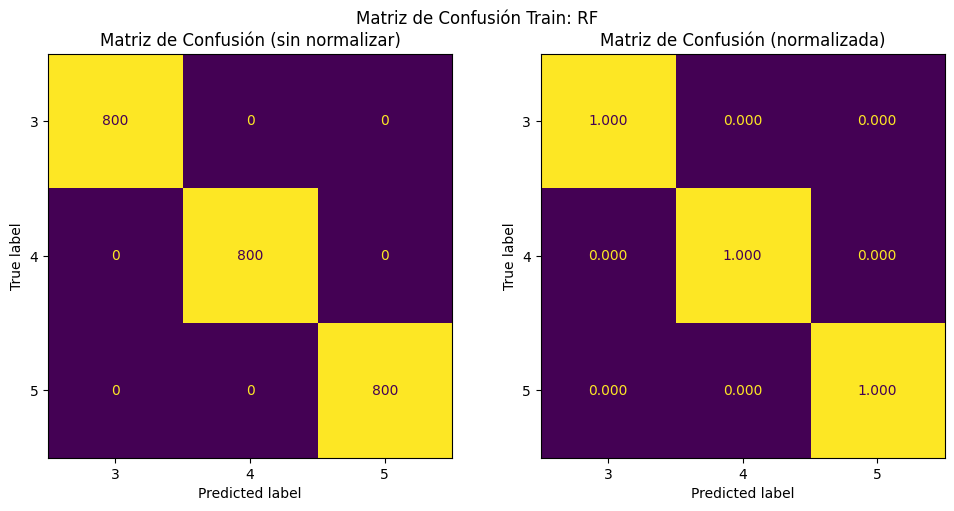

In [35]:
######################################################################
# Train
######################################################################
Y_pred_train_BoW = best_clf_BoW.predict(X_train_BoW)
print(classification_report(Y_train_clean, Y_pred_train_BoW))
######################################################################
# Matriz de Confusión
######################################################################
cm_BoW = confusion_matrix(Y_train_clean, Y_pred_train_BoW)
disp_BoW = ConfusionMatrixDisplay(confusion_matrix=cm_BoW, display_labels=best_clf_BoW.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_BoW.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')

cm_BoW_norm = confusion_matrix(Y_train_clean, Y_pred_train_BoW, normalize='true')
disp_BoW_norm = ConfusionMatrixDisplay(confusion_matrix=cm_BoW_norm, display_labels=best_clf_BoW.classes_)
disp_BoW_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Train: RF')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           3       0.93      0.92      0.93       200
           4       0.95      0.94      0.95       200
           5       0.94      0.95      0.95       200

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



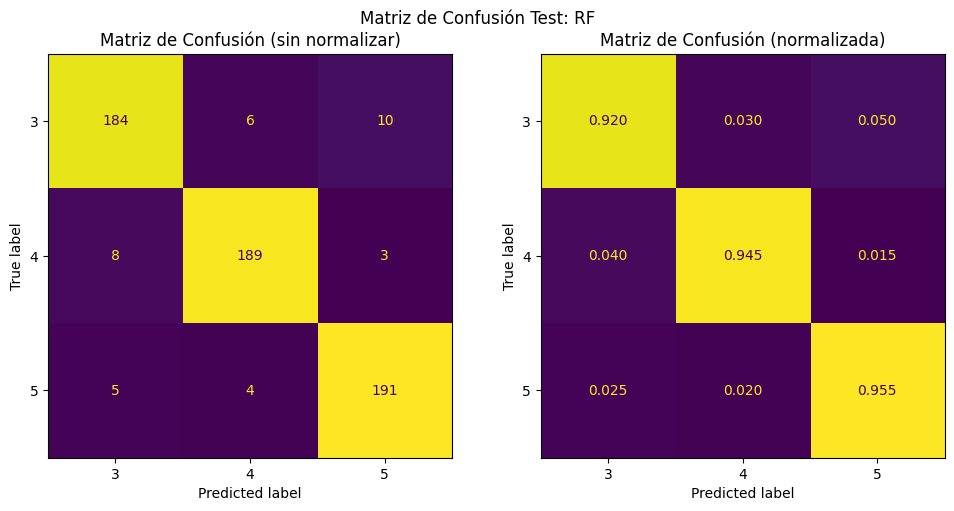

Accuracy: 0.9517 
F1: 0.9514


In [66]:
######################################################################
# Test
######################################################################
Y_pred_test_BoW = best_clf_BoW.predict(X_test_BoW)
print(classification_report(Y_test_clean, Y_pred_test_BoW))
######################################################################
# Matriz de Confusión
######################################################################
cm_BoW = confusion_matrix(Y_test_clean, Y_pred_test_BoW)
disp_BoW = ConfusionMatrixDisplay(confusion_matrix=cm_BoW, display_labels=best_clf_BoW.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_BoW.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_BoW_norm = confusion_matrix(Y_test_clean, Y_pred_test_BoW, normalize='true')
disp_BoW_norm = ConfusionMatrixDisplay(confusion_matrix=cm_BoW_norm, display_labels=best_clf_BoW.classes_)
disp_BoW_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Test: RF')
plt.tight_layout()
plt.show()
######################################################################
# Cross Validation Results - BoW Train
######################################################################
print("Validación Cruzada Train")
scores = cross_val_score(best_clf_BoW, X_train_BoW, Y_train_clean, cv=particiones, scoring='accuracy')
print(f"Accuracy: {scores.mean():.4f} ")
scores = cross_val_score(best_clf_BoW, X_train_BoW, Y_train_clean, cv=particiones, scoring='f1_macro')
print(f"F1: {scores.mean():.4f}")


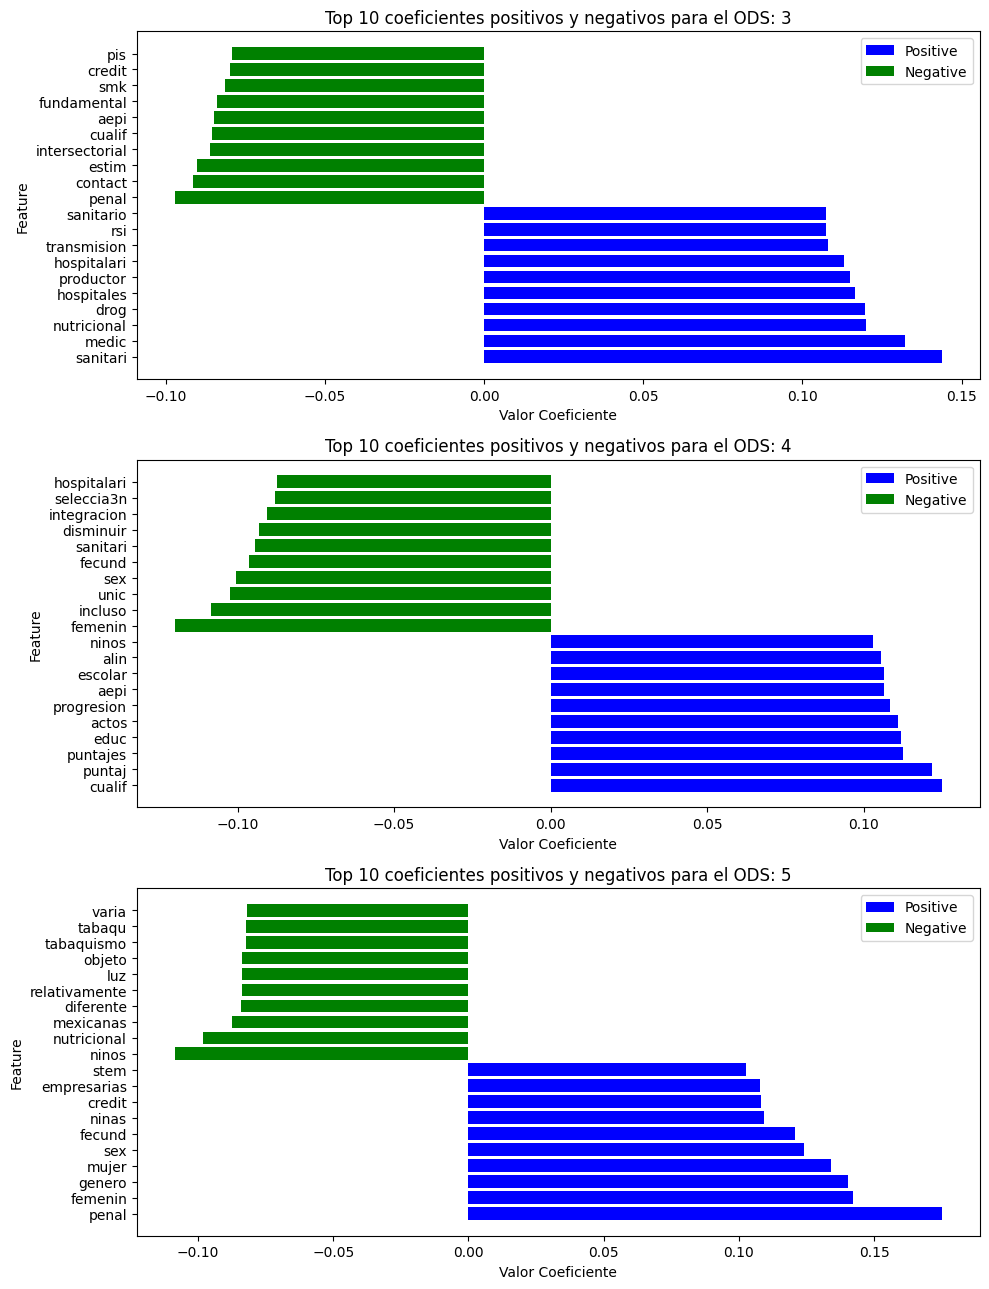

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=3, figsize=(10, 13))
for i in range(3):
    coefficients_df = pd.DataFrame({'Feature': dummy.get_feature_names_out(), 'Coefficient': best_clf_BoW.coef_[i]})

    # Sort the DataFrame by coefficient values in descending order and select the top 10 positive and negative coefficients.
    top_positive = coefficients_df.sort_values(by='Coefficient', ascending=False).head(10)
    top_negative = coefficients_df.sort_values(by='Coefficient', ascending=True).head(10)
    # Concatenate the top positive and negative coefficients.
    axs[i].barh(top_positive['Feature'], top_positive['Coefficient'], color='blue')
    axs[i].barh(top_negative['Feature'], top_negative['Coefficient'], color='green')
    axs[i].set_title(f"Top 10 coeficientes positivos y negativos para el ODS: {i+3}")
    axs[i].set_xlabel("Valor Coeficiente")
    axs[i].set_ylabel("Feature")
    axs[i].legend(['Positive', 'Negative'])
plt.tight_layout()
plt.show()

In [38]:
for i, tag in enumerate(best_clf_BoW.classes_):
    coefficients = best_clf_BoW.coef_[i]
    weights = list(zip(dummy.get_feature_names_out(), coefficients))
    print(f"Tag: {tag}")
    print("Most positive Coefficients: ")
    print(sorted(weights, key=lambda x: -x[1])[:10])
    print("Most negative Coefficients: ")
    print(sorted(weights, key=lambda x: x[1])[:10])
    print("*"*50)

Tag: 3
Most positive Coefficients: 
[('sanitari', 0.1437597410925045), ('medic', 0.13231647447638892), ('nutricional', 0.11990567619205157), ('drog', 0.11974859917524784), ('hospitales', 0.11642757964447799), ('productor', 0.1149675248100622), ('hospitalari', 0.11316827214839892), ('transmision', 0.10813041445117698), ('rsi', 0.10748804279578014), ('sanitario', 0.10744886290062268)]
Most negative Coefficients: 
[('penal', -0.09708147425280633), ('contact', -0.0915524994938596), ('estim', -0.09033343524518635), ('intersectorial', -0.08612202563165204), ('cualif', -0.08551169076092285), ('aepi', -0.0847949902452723), ('fundamental', -0.08399210134409758), ('smk', -0.08130023533232199), ('credit', -0.07975599587687558), ('pis', -0.07927993112415271)]
**************************************************
Tag: 4
Most positive Coefficients: 
[('cualif', 0.12497923460156615), ('puntaj', 0.12177042877084576), ('puntajes', 0.11248233511866264), ('educ', 0.11185382263602986), ('actos', 0.1108867844

#####  3.3.2 Tfidf

In [39]:
grid_search_TFID = GridSearchCV(clf, param_grid, cv=particiones, n_jobs=-1)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=Warning)
    grid_search_TFID.fit(X_train_TFID, Y_train_clean)
print(grid_search_TFID.best_params_)
print(grid_search_TFID.best_score_)
best_clf_TFID = grid_search_TFID.best_estimator_

{'alpha': 0.87}
0.9783333333333333


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       800
           4       1.00      1.00      1.00       800
           5       1.00      1.00      1.00       800

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



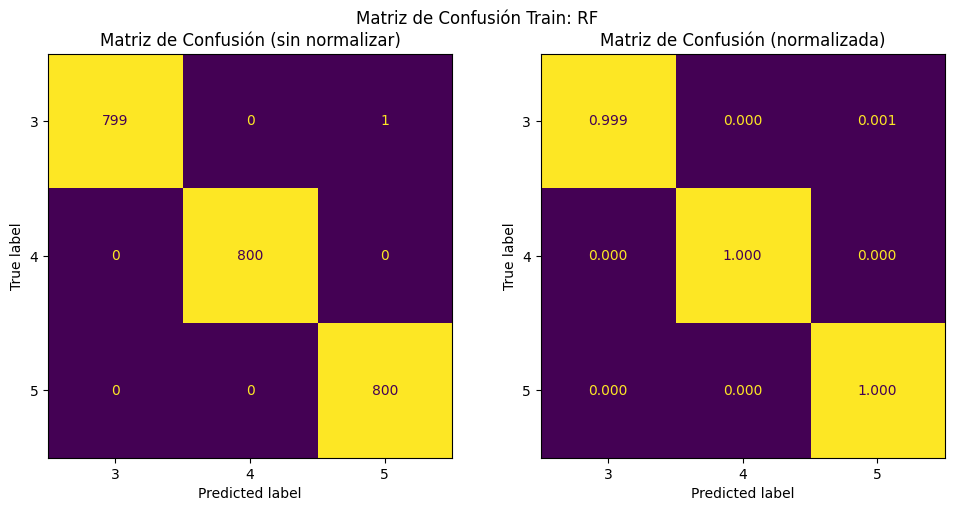

In [40]:
######################################################################
# Train
######################################################################
Y_pred_train_TFID = best_clf_TFID.predict(X_train_TFID)
print(classification_report(Y_train_clean, Y_pred_train_TFID))
######################################################################
# Matriz de Confusión
######################################################################
cm_TFID = confusion_matrix(Y_train_clean, Y_pred_train_TFID)
disp_TFID = ConfusionMatrixDisplay(confusion_matrix=cm_TFID, display_labels=best_clf_TFID.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_TFID.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_TFID_norm = confusion_matrix(Y_train_clean, Y_pred_train_TFID, normalize='true')
disp_TFID_norm = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_norm, display_labels=best_clf_TFID.classes_)
disp_TFID_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Train: RF')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           3       0.98      0.97      0.98       200
           4       0.97      0.99      0.98       200
           5       0.98      0.98      0.98       200

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



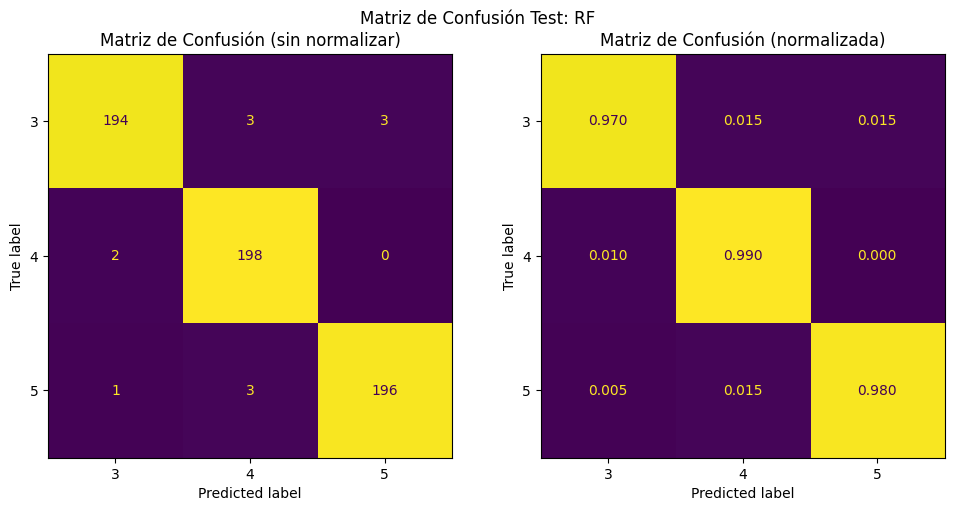

Score F1: 0.9665
Score Accuracy: 0.9667


In [63]:
######################################################################
# Test
######################################################################
Y_pred_test_TFID = best_clf_TFID.predict(X_test_TFID)
print(classification_report(Y_test_clean, Y_pred_test_TFID))

######################################################################
# Matriz de Confusión
######################################################################
cm_TFID_test = confusion_matrix(Y_test_clean, Y_pred_test_TFID)
disp_TFID_test = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_test, display_labels=best_clf_TFID.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_TFID_test.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_TFID_norm_test = confusion_matrix(Y_test_clean, Y_pred_test_TFID, normalize='true')
disp_TFID_norm_test = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_norm_test, display_labels=best_clf_TFID.classes_)
disp_TFID_norm_test.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Test: RF')
plt.tight_layout()
plt.show()
######################################################################
# Resultados Cross Validation Test
######################################################################
score_f1 = cross_val_score(best_clf_TFID, X_test_TFID, Y_test_clean, cv=particiones, scoring='f1_macro')
score_accuracy = cross_val_score(best_clf_TFID, X_test_TFID, Y_test_clean, cv=particiones, scoring='accuracy')
print(f"Score F1: {round(score_f1.mean(),4)}")
print(f"Score Accuracy: {round(score_accuracy.mean(),4)}")

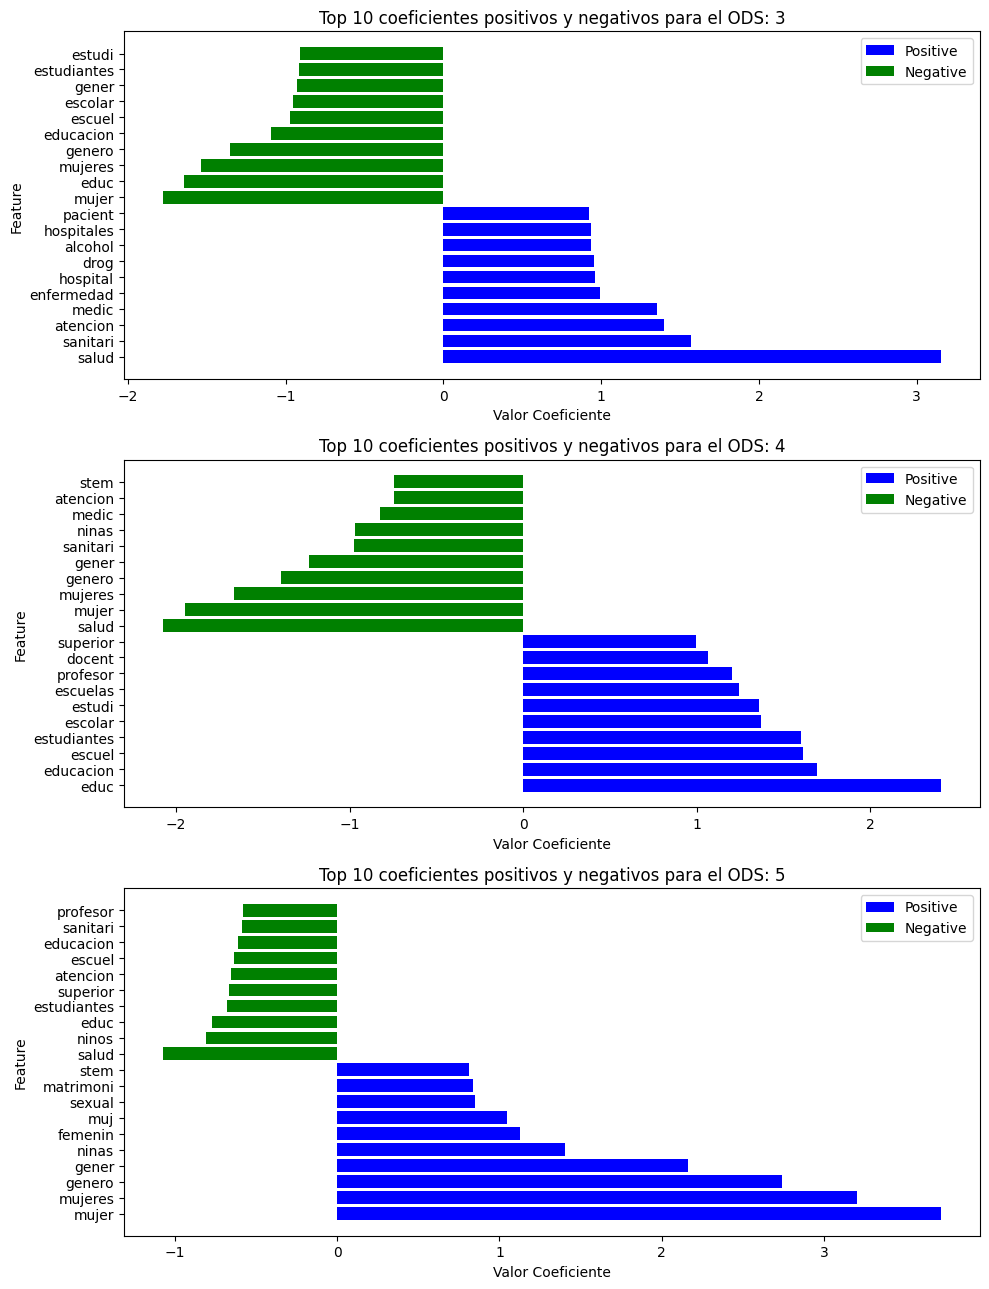

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=3, figsize=(10, 13))
for i in range(3):
    coefficients_df = pd.DataFrame({'Feature': vectorizer.get_feature_names_out(), 'Coefficient': best_clf_TFID.coef_[i]})

    top_positive = coefficients_df.sort_values(by='Coefficient', ascending=False).head(10)
    top_negative = coefficients_df.sort_values(by='Coefficient', ascending=True).head(10)

    axs[i].barh(top_positive['Feature'], top_positive['Coefficient'], color='blue')
    axs[i].barh(top_negative['Feature'], top_negative['Coefficient'], color='green')
    axs[i].set_title(f"Top 10 coeficientes positivos y negativos para el ODS: {i+3}")
    axs[i].set_xlabel("Valor Coeficiente")
    axs[i].set_ylabel("Feature")
    axs[i].legend(['Positive', 'Negative'])
plt.tight_layout()
plt.show()

In [43]:
for i, tag in enumerate(best_clf_TFID.classes_):
    coefficients = best_clf_TFID.coef_[i]
    weights = list(zip(vectorizer.get_feature_names_out(), coefficients))
    print(f"Tag: {tag}")
    print("Most positive Coefficients: ")
    print(sorted(weights, key=lambda x: -x[1])[:10])
    print("Most negative Coefficients: ")
    print(sorted(weights, key=lambda x: x[1])[:10])
    print("*"*50)

Tag: 3
Most positive Coefficients: 
[('salud', 3.15460492777083), ('sanitari', 1.5716895298419384), ('atencion', 1.3990654660515636), ('medic', 1.3550106399112944), ('enfermedad', 0.994574263462846), ('hospital', 0.963598452785666), ('drog', 0.9577098034617864), ('alcohol', 0.9370106350712163), ('hospitales', 0.9335399482944592), ('pacient', 0.9256588170365717)]
Most negative Coefficients: 
[('mujer', -1.777767098979065), ('educ', -1.6422552371217756), ('mujeres', -1.5387940057542164), ('genero', -1.353120050884067), ('educacion', -1.091239496036024), ('escuel', -0.9722345885450291), ('escolar', -0.9538071725348629), ('gener', -0.9296080954010317), ('estudiantes', -0.9115428775937553), ('estudi', -0.9110316338046637)]
**************************************************
Tag: 4
Most positive Coefficients: 
[('educ', 2.4087019176645534), ('educacion', 1.6955206880350076), ('escuel', 1.6104785971391438), ('estudiantes', 1.5999302097651351), ('escolar', 1.369226962876588), ('estudi', 1.35989

## 4. Resultados Finales (Parte 1)

In [ ]:
# Etiquetado de datos de resultado
dataR = pd.read_excel("data/SinEtiquetatest_cat_345.xlsx")

In [ ]:
# Duplicados
duplicates = dataR.duplicated()
num_duplicates = duplicates.sum()

print("Número de duplicados: ", num_duplicates)

In [ ]:
# Completitud
print((dataR.isnull().sum() / dataR.shape[0]).sort_values(ascending = False))

In [ ]:
YR = dataR['sdg']
XR = dataR.drop(['sdg'], axis=1)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234, stratify=Y)
print(f"Total de filas en X {XR.shape[0]} y Y {YR.shape[0]}")

In [ ]:
def limpiarDatos(XR):
    "Recibe como parámetros un dataframe y devuelve el mismo con una columna adicional con el texto limpio"
    "Usa las funciones de preprocesamiento y lematización definidas anteriormente"
    XR['texto_limpio'] = XR['Textos_espanol'].swifter.apply(word_tokenize,language="spanish").swifter.apply(preprocessing)
    XR['texto_limpio'] = XR['texto_limpio'].swifter.apply(stem_and_lemmatize).swifter.apply(join_words)
    return XR

In [ ]:
XR = limpiarDatos(XR)

In [ ]:
#Codificacion
def codificarTDIDF(XR):
    XR_BoW = vectorizer.transform(XR['texto_limpio'])
    return XR_BoW

In [ ]:
XR = codificarTDIDF(XR)

In [ ]:
def predecirTDIDF(XR):
    Y_pred = best_clf_TFID.predict(XR)
    return Y_pred


In [ ]:
# Etiquetar los datos
def etiquetarDatos(dataR, Y_pred):
    dataR['sdg'] = Y_pred
    return dataR


In [ ]:
# Guardar los datos etiquetados en excel
def guardarDatos(dataR):
    dataR.to_excel("data/Etiquetado_cat_345.xlsx")


In [ ]:
def main():
    dataR = pd.read_excel("data/SinEtiquetatest_cat_345.xlsx")
    XR = dataR.drop(['sdg'], axis=1)
    XR = limpiarDatos(XR)
    XR = codificarBoW(XR)
    Y_pred = predecirBoW(XR)
    dataR = etiquetarDatos(dataR, Y_pred)
    guardarDatos(dataR)